In [2274]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [2275]:
Taxi_Df = pd.read_csv("dirty_taxi_data.csv")

## Data Exploration

In [2276]:
print("First 5 rows of the dataset:")
Taxi_Df.head()

First 5 rows of the dataset:


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-01-16 20:06:00.000000168,3.3,2010-01-16 20:06:00 UTC,-73.953323,40.778532,-73.953375,40.772505,error_1.0
1,2010-09-22 23:21:00.00000065,6.5,2010-09-22 23:21:00 UTC,-73.985542,40.738333,-74.003350,40.738935,1.0
2,2013-10-17 18:40:14.0000001,5.0,2013-10-17 18:40:14 UTC,-73.999945,40.718097,-73.999239,40.723103,1.0
3,2015-06-09 19:39:42.0000009,40.5,2015-06-09 19:39:42 UTC,-73.974533,40.756237,-73.923149,40.867210,1.0
4,2012-05-01 07:16:59.0000001,7.7,2012-05-01 07:16:59 UTC,-73.952835,40.786351,-73.974022,40.762765,1.0


In [2277]:
print("\nLast 5 rows of the dataset:")
Taxi_Df.tail()


Last 5 rows of the dataset:


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
114995,2012-10-20 13:50:00.00000091,165.0,2012-10-20 13:50:00 UTC,-74.006435,40.732602,-73.980660,40.733897,1.0
114996,2012-04-04 20:05:00.000000261,4.5,2012-04-04 20:05:00 UTC,-73.955827,40.767640,-73.964683,40.762422,1.0
114997,2010-01-25 22:46:15.0000004,NaN,2010-01-25 22:46:15 UTC,-74.007678,40.711676,-73.997685,40.678757,1.0
114998,2009-06-11 22:02:45.0000002,12.5,2009-06-11 22:02:45 UTC,-74.002465,40.707247,-73.976805,40.751910,1.0
114999,2013-02-13 17:03:34.0000002,6.5,2013-02-13 17:03:34 UTC,-73.972745,40.759291,-73.980035,40.751461,1.0


In [2278]:
print("\nBasic information about the dataset:")
Taxi_Df.info()


Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115000 entries, 0 to 114999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                115000 non-null  object 
 1   fare_amount        92160 non-null   float64
 2   pickup_datetime    115000 non-null  object 
 3   pickup_longitude   115000 non-null  float64
 4   pickup_latitude    115000 non-null  float64
 5   dropoff_longitude  115000 non-null  float64
 6   dropoff_latitude   115000 non-null  float64
 7   passenger_count    93074 non-null   object 
dtypes: float64(5), object(3)
memory usage: 7.0+ MB


=> "passenger_count" is an object column, it should be float

In [2279]:
print("\nSummary statistics of numerical columns:")
numerical_df=pd.DataFrame(Taxi_Df.describe())
describe


Summary statistics of numerical columns:


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,92160.000000,115000.000000,115000.000000,115000.000000,115000.000000
mean,16.431745,-72.559159,39.946204,-72.566149,39.939186
std,32.339641,10.650615,6.020752,10.218077,11.215051
min,-25.000000,-736.400000,-74.008970,-90.239125,-3114.304848
25%,6.100000,-73.992103,40.734890,-73.991481,40.734044
50%,8.500000,-73.981890,40.752672,-73.980078,40.753122
75%,13.700000,-73.967190,40.767137,-73.963695,40.768010
max,1456.600000,40.808197,90.016667,40.814702,407.000000


=> huge difference between the min and max value in "fare_amount" column 

In [2280]:
print("\nMissing values in each column:")
Taxi_Df.isnull().sum()


Missing values in each column:


key                      0
fare_amount          22840
pickup_datetime          0
pickup_longitude         0
pickup_latitude          0
dropoff_longitude        0
dropoff_latitude         0
passenger_count      21926
dtype: int64

=> missign values for "fare_amount" and "passenger_count" columns

In [2281]:
print("\nShape of the dataset (rows, columns):")
print(Taxi_Df.shape)


Shape of the dataset (rows, columns):
(115000, 8)


In [2282]:
print("\nData types of each column:")
Taxi_Df.dtypes


Data types of each column:


key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count       object
dtype: object


Correlation matrix:


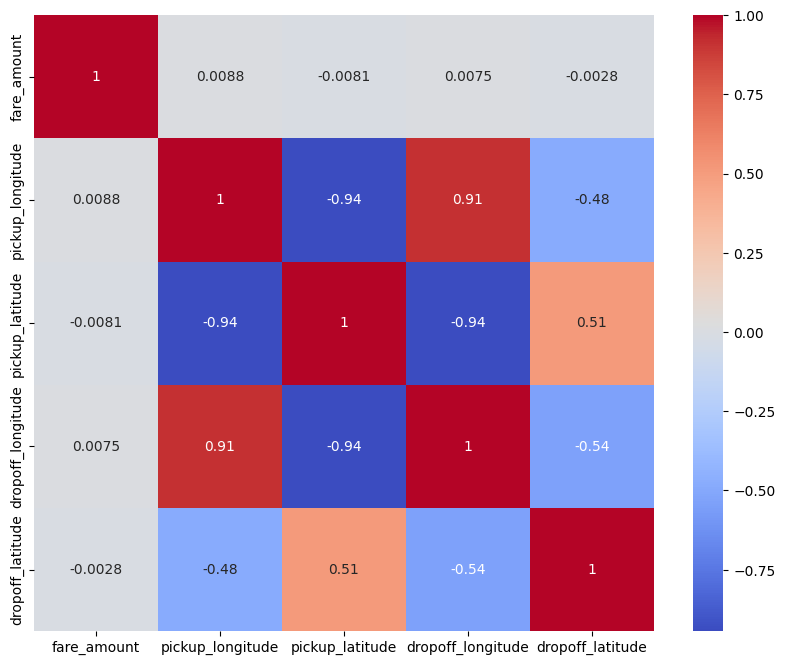

In [2283]:
print("\nCorrelation matrix:")
numerical = Taxi_Df[describe.columns]
correlation_matrix=numerical.corr()

plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix,annot=True, cmap = 'coolwarm')
plt.show()

=> "passenger_count" column should be fixed (invalid values) and its type would be float 

## Data Cleaning

##### - "passenger_count" column :

In [2284]:
print(f"\nValue counts for column passenger_count:")
print(Taxi_Df["passenger_count"].value_counts())



Value counts for column passenger_count:
passenger_count
1.0          60568
2.0          12742
5.0           6053
3.0           3872
error_1.0     3220
4.0           1889
6.0           1857
error_nan     1129
error_2.0      698
0.0            343
error_5.0      294
error_3.0      202
error_4.0       97
error_6.0       96
error_0.0       14
Name: count, dtype: int64


In [2285]:

repl_dict={"error_nan":"0.0", "error_":""}
for old, new in repl_dict.items():
    Taxi_Df["passenger_count"] = Taxi_Df["passenger_count"].str.replace(old,new)

In [2286]:
print(f"\nValue counts for column passenger_count:")
print(Taxi_Df["passenger_count"].value_counts())


Value counts for column passenger_count:
passenger_count
1.0    63788
2.0    13440
5.0     6347
3.0     4074
4.0     1986
6.0     1953
0.0     1486
Name: count, dtype: int64



- It is impossible to have 0 passenger => replace them with the mean

In [2287]:
Taxi_Df["passenger_count"]=Taxi_Df["passenger_count"].astype(float)
mean=Taxi_Df["passenger_count"].mean()
print("mean:", mean)
Taxi_Df["passenger_count"] = Taxi_Df["passenger_count"].replace(0.0,round(mean))

mean: 1.6576809850226701


In [2288]:
Taxi_Df["passenger_count"] = Taxi_Df["passenger_count"].fillna(value=mean)
Taxi_Df = Taxi_Df[~Taxi_Df["passenger_count"].isin(["error_nan", "0.0"])]
Taxi_Df["passenger_count"] = Taxi_Df["passenger_count"].astype(int)

##### - "fare_amount" column :

In [2289]:
Taxi_Df.dropna(subset=["fare_amount"], inplace=True)

In [2290]:
print("\nMissing values in each column:")
Taxi_Df.isnull().sum()


Missing values in each column:


key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [2291]:
Taxi_Df=Taxi_Df[Taxi_Df["fare_amount"]>0]

In [2292]:

print("\nShape of the dataset (rows, columns):")
print(Taxi_Df.shape) 


Shape of the dataset (rows, columns):
(92154, 8)


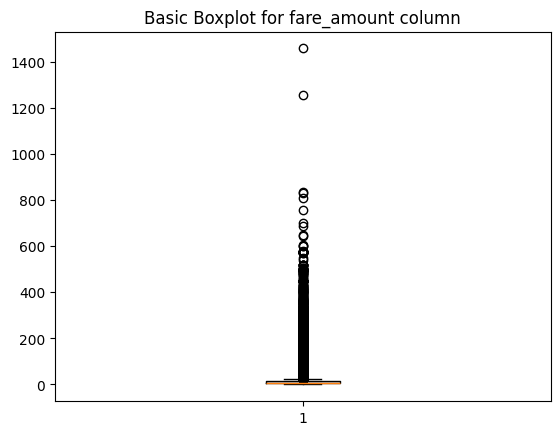

In [2293]:
plt.boxplot(x="fare_amount", data=Taxi_Df) 
plt.title('Basic Boxplot for fare_amount column')
plt.show()

In [2294]:
duplicates=Taxi_Df[Taxi_Df.duplicated()]
print("number of duplicates: ",len(duplicates))
Taxi_Df.drop(duplicates.index, inplace=True)

number of duplicates:  8693


# splitting the data


In [2295]:

scaler = StandardScaler()
numerical_df_scaled = scaler.fit_transform(numerical_df)
scaled_Taxi_Df = pd.DataFrame(describe_scaled, 
                         columns=numerical_df.columns)
scaled_Taxi_Df


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,2.645430,2.645702,2.645750,2.645750,2.644735
1,-0.384465,-0.376189,-0.377606,-0.378618,-0.367289
2,-0.383942,-0.374003,-0.378498,-0.376443,-0.368041
3,-0.385828,-0.393621,-0.380603,-0.379083,-0.449932
4,-0.384805,-0.376226,-0.377585,-0.378656,-0.367268
5,-0.384726,-0.376226,-0.377585,-0.378656,-0.367267
6,-0.384555,-0.376226,-0.377584,-0.378655,-0.367267
7,-0.337109,-0.373211,-0.376289,-0.375639,-0.357671


In [2296]:
X=scaled_Taxi_Df.drop(["fare_amount"],axis=1)
y=scaled_Taxi_Df[["fare_amount"]]

In [2297]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse


In [2298]:
models_result={}

In [2299]:
# important features 
importances = best_rf.feature_importances_
print("fetaures impotances:", importances)

fetaures impotances: [0.25078724 0.27494666 0.24495287 0.22931324]


=> roughly same importances

In [2300]:
models={LinearRegression():"Linear Regression MSE:",AdaBoostRegressor(random_state=42, n_estimators=100):"AdaBoost MSE:", Lasso(alpha=0.3):"Lasso MSE: " }

In [2301]:
for model, result in models.items():
    m=model
    mse = evaluate_model(m, X_train, X_test, y_train, y_test)
    models_result[result]=mse
    print("\n",result,mse)
    


 Linear Regression MSE: 343016.6935184985

 AdaBoost MSE: 2.965179189258102

 Lasso MSE:  3.041555569138694


/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###  Ridge Model

In [2302]:
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge_mse = evaluate_model(ridge, X_train, X_test, y_train, y_test)
    ridge_scores.append(ridge_mse)
print(ridge_scores)
print("Redge MSE:", min(ridge_scores))
best_alpha=alphas[0]
models_result["Ridge"]=min(ridge_scores)


[np.float64(2.9434039835924932), np.float64(3.0311636973706833), np.float64(3.0405102251210834), np.float64(3.041450972752491), np.float64(3.0415451088798098), np.float64(3.0415545231066026)]
Redge MSE: 2.9434039835924932


### Random Forest Regressor Model

In [2303]:
rf = RandomForestRegressor(random_state=42)
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, 
                                   n_iter=10, scoring='neg_mean_squared_error', 
                                   cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_

print("Best parameters for RandomForest:", random_search.best_params_)
RF_mse = evaluate_model(best_rf, X_train, X_test, y_train, y_test)
print(" Random Fores tRegressor MSE :", RF_mse)

models_result["RF with RandomizedSearchCV"]=RF_mse
print("\nmodels result:",models_result)

/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array

Best parameters for RandomForest: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
 Random Fores tRegressor MSE : 2.99385755859663

models result: {'Linear Regression MSE:': np.float64(343016.6935184985), 'AdaBoost MSE:': np.float64(2.965179189258102), 'Lasso MSE: ': np.float64(3.041555569138694), 'Ridge': np.float64(2.9434039835924932), 'RF with RandomizedSearchCV': np.float64(2.99385755859663)}


/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [2304]:
rf = RandomForestRegressor(random_state=42)
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rf_grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=kf, scoring="neg_mean_squared_error")
rf_grid_search.fit(X_train, y_train)

print("Tuned Random Forest parameters: {}".format(rf_grid_search.best_params_))
print("Tuned Random Forest score: {}".format(rf_grid_search.best_score_))

/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array

Tuned Random Forest parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest score: -0.0005115118604873722


/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/macmini/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [2305]:
y_pred = rf_grid_search.best_estimator_.predict(X_test)
RandomForestRegressor_mse = mean_squared_error(y_test, y_pred)
print("RandomForestRegressor with grid_search MSE:", RandomForestRegressor_mse)

RandomForestRegressor with grid_search MSE: 2.9924270663009485


In [2306]:
models_result["RF with grid_search"]=RandomForestRegressor_mse

In [2307]:
print("\nmodels result:")
models_result


models result:


{'Linear Regression MSE:': np.float64(343016.6935184985),
 'AdaBoost MSE:': np.float64(2.965179189258102),
 'Lasso MSE: ': np.float64(3.041555569138694),
 'Ridge': np.float64(2.9434039835924932),
 'RF with RandomizedSearchCV': np.float64(2.99385755859663),
 'RF with grid_search': np.float64(2.9924270663009485)}

### MSE visualization

2.9434039835924932


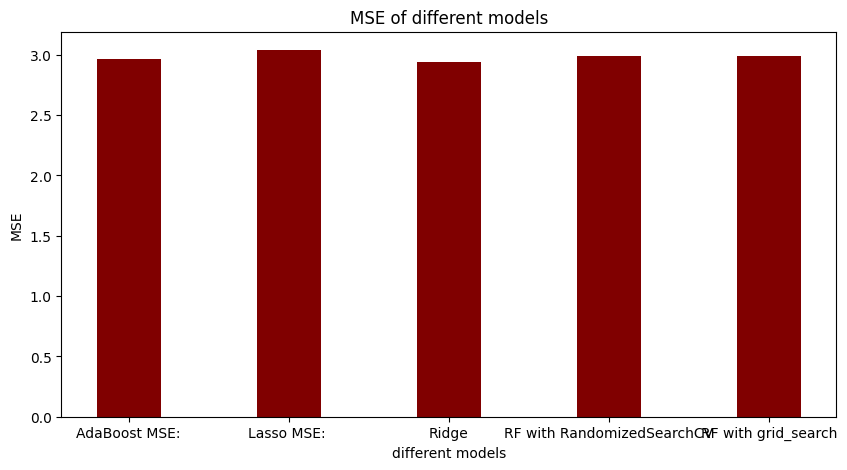

In [2308]:
model = list(models_result.keys())[1:]
mse = list(models_result.values())[1:]
print(min(mse))
 
fig = plt.figure(figsize = (10, 5))

plt.bar(model, mse, color ='maroon', 
        width = 0.4)

plt.xlabel("different models")
plt.ylabel("MSE")
plt.title("MSE of different models")
plt.show()

In [2309]:
print("Ridge is the most performant with MSE= ",min(mse))

Ridge is the most performant with MSE=  2.9434039835924932
